# Contrast Stretching

In [1]:
#import external packages 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from PIL import Image 

%matplotlib inline

def originalImage(image):
    
    #open image using PIL package and convert to numpy array 
    mona = np.array(Image.open(image))

    #show original image
    plt.imshow(mona, cmap='gray')
    plt.title('Original Image')
    plt.show()
    
    return mona

In [7]:
def plotHist(original_image):

    #convert pixels to float value 
    img = original_image.astype(float)

    #flatten image so its dim is 90000x1
    flatten_img = img.ravel()

    #plot a histogram of the distripution of pixels 
    hist = plt.hist(flatten_img, bins=256)
    plt.xlabel('grayscale 0 to 255')
    plt.ylabel('number of pixels')
    plt.title('Distribution of pixels')
    plt.show()
    
    return img, flatten_img

In [8]:
def splitImage(flat_image):

    #sort pixels from desc to asc to split in 3
    sorted_img_vec = np.sort(flat_image)

    #split images based on pixel distribution in histogram
    #since the image is now 90000x1 the first 3rd of pixels 
    #can be chosen as sorted_img_vec[30000]. 
    for i in range(len(flat_image)):
        #once image is split reassign sections of the flattened vector 
        #to 0, 127, and 255
        #reset pixels in the first range to 0
        if flat_image[i] < sorted_img_vec[30000]:
            flat_image[i] = 0
        #reset pixels in the middle range to 127
        elif flat_image[i] <= sorted_img_vec[60000]:
            flat_image[i] = 127
        #reset pixels in the third range to 255
        else:
            flat_image[i] = 255

    #reshape image to original dimensions, 360x250 to be able to plot
    three_level_img = flat_image.reshape(360, 250)

    #show plot 
    plt.imshow(three_level_img, cmap='gray')
    plt.title('3-level image')
    plt.show()
    
    return three_level_img, sorted_img_vec

In [9]:
def kmeans(original_image):

    #apply k-means with k=8. fit with the original image
    kmeans = KMeans(n_clusters=8, random_state=0).fit(original_image)

    #get the cluster centers and is corresponding labels 
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    #plot reshaped image 
    plt.imshow(cluster_centers[cluster_labels].reshape(360, 250), cmap='gray')
    plt.title('K-means clustering with K = 8')
    plt.show()

In [10]:
def brighterImage(flat_image, sorted_image):

    #double the value of each pixel with a value in [0, 127]
    #and set all the other pixels to a value of 155
    for i in range(len(flat_image)):
        if flat_image[i] <= sorted_image[60000]:
            flat_image[i] = 2 * flat_image[i]
        else:
            flat_image[i] = 255

    #reshape brighter image 
    brighter_img = flat_image.reshape(360, 250)

    #show brighter image
    plt.imshow(brighter_img, cmap='gray')
    plt.title('Brighter image')
    plt.show()
    
    return brighter_img

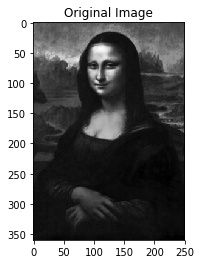

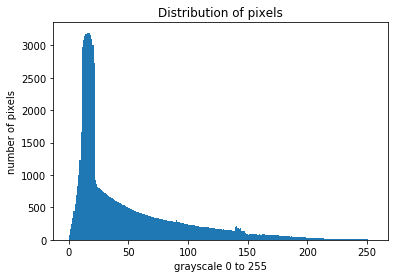

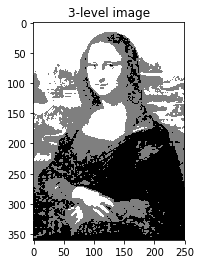

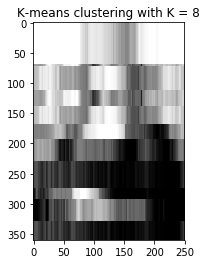

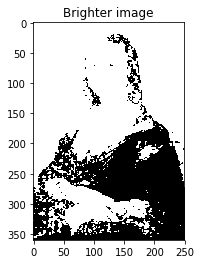

In [14]:
#driver code for contrast stretching run 1

#get original image
mona = originalImage('mona_lisa.png')

#show distribution of pixels 
image, flat_img = plotHist(mona)

#divide image into three ranges 
three_lev_img, sorted_image = splitImage(flat_img)

#apply k-means
kmeans(image)

#brighten image
brighter_image = brighterImage(flat_img, sorted_image)

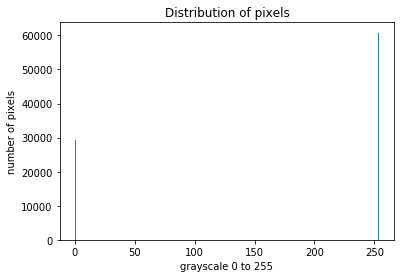

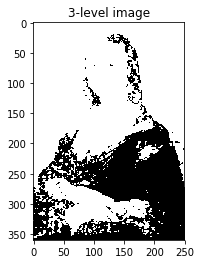

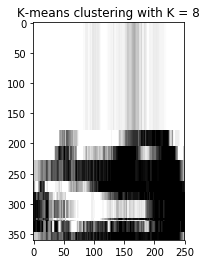

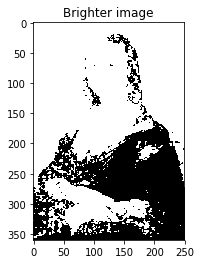

In [18]:
#driver code for contrast stretching run 2

#show distribution of pixels 
image, flat_img = plotHist(brighter_image)

#divide image into three ranges 
three_lev_img, sorted_image = splitImage(flat_img)

#apply k-means
kmeans(image)

#brighten image
brighter_image = brighterImage(flat_img, sorted_image)

# Noise Removal 

In [19]:
def noiseRemoval(image, avg_type, n_iter):
    
    #read in image
    lizard = np.array(Image.open(image))
    
    #convert image to double
    p = lizard.astype(float)
    
    #get shape of image 
    m, n = lizard.shape
    
    p2 = p
    
    #og count 
    count = n_iter
    
    #denoise the image by replacing each pixel with 
    #the average value of its 3x3 neighbors
    for i in range(2, m-1):
        for j in range(2, n-1):
            p2[i,j] = avg_type((p[i+1, j-1], p[i+1, j], p[i+1, j+1],
                           p[i, j-1], p[i, j], p[i, j+1], p[i-1, j-1],
                           p[i-1, j], p[i-1, j+1]))

    #convert back to uint8
    g = p2.astype(np.uint8)
    
    #plot images
    atype = 'mean' if avg_type == np.mean else 'median' 
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(g, cmap='gray')
    ax[0].set_title('Noise removal using {} for {} iteration(s)'.format(atype, count), fontsize=18)
    ax[1].imshow(lizard, cmap='gray') 
    ax[1].set_title('Original Image', fontsize=18)
    plt.show()
        
    return 

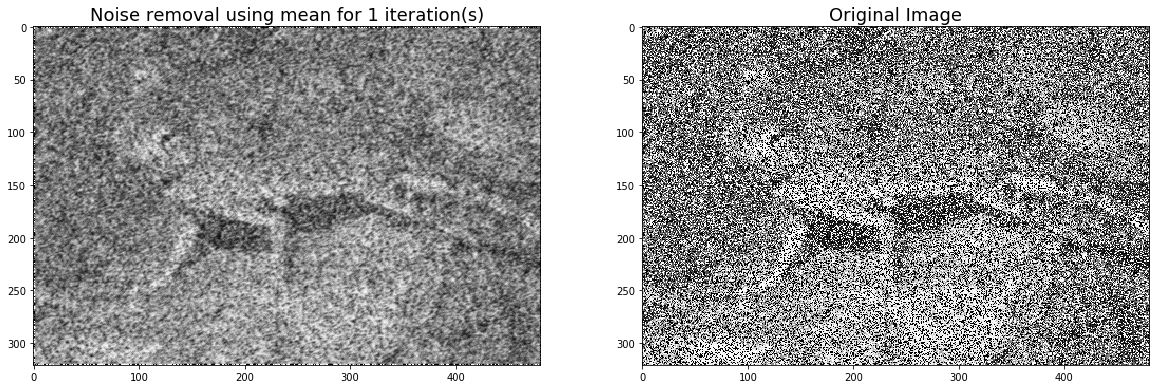

In [20]:
noiseRemoval('lizard_noisy.png', np.mean, 1)

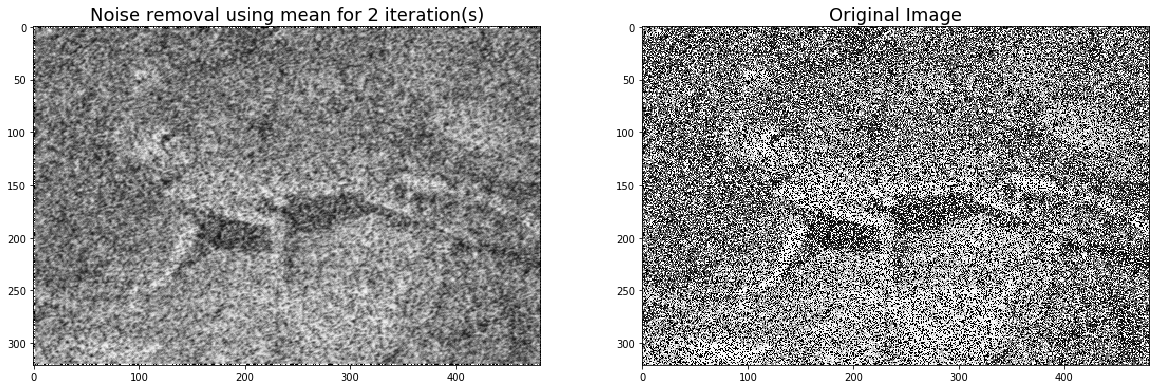

In [21]:
noiseRemoval('lizard_noisy.png', np.mean, 2)

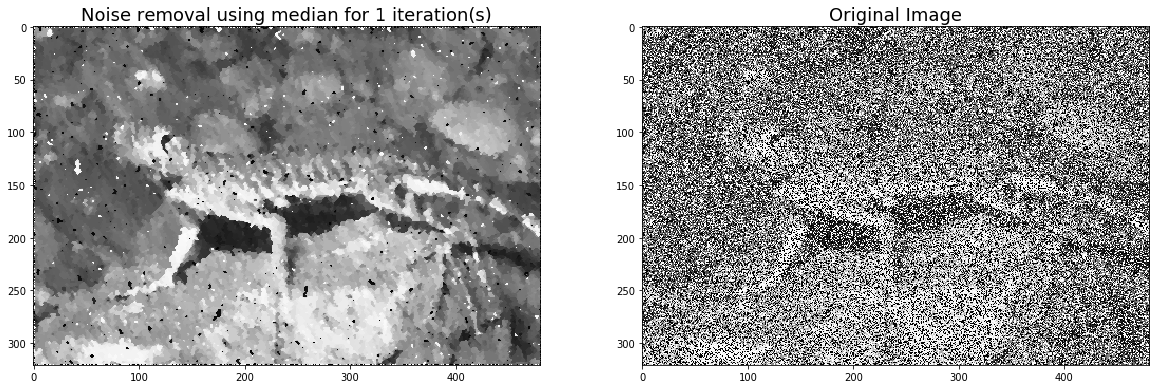

In [22]:
noiseRemoval('lizard_noisy.png', np.median, 1)

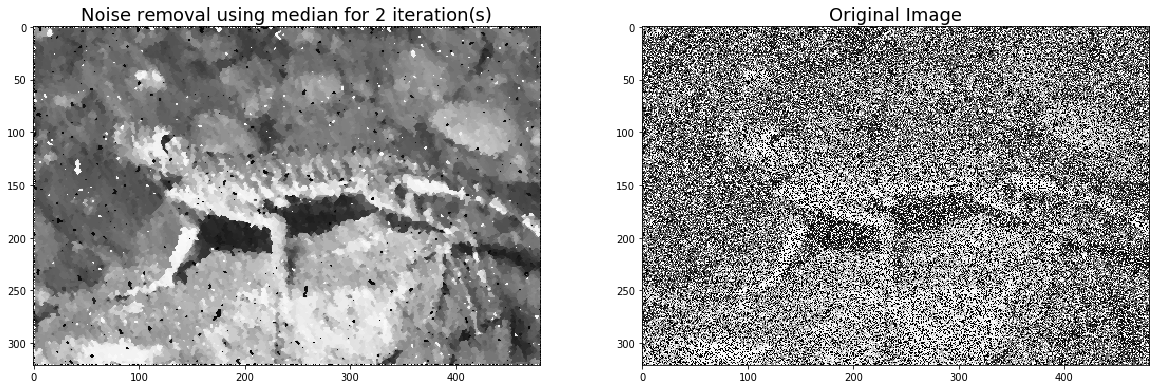

In [23]:
noiseRemoval('lizard_noisy.png', np.median, 2)

# Edge Detection

In [24]:
def edgeDetection (img, threshold):
    
    #read in image
    a = np.array(Image.open(img))
    
    #get the dimensions of the image 
    m, n = a.shape
    
    #convert to a float 
    b = a.astype(float)
    
    #edge matrix 
    e = np.zeros((m, n))
    e[2:m-1, 2:n-1] = (abs(b[3:m, 2:n-1] - b[1:m-2, 2:n-1]) +
                       abs(b[2:m-1, 3:n] - b[2:m-1, 1:n-2]))
    
    #scale E to [0, 255]
    emin = np.min(np.min(e))
    emax = np.max(np.max(e))
    
    #plot it 
    e = np.round(255 * (e - emin) / (emax - emin))
    
    #using a threshold 
    e_thresh = 255 * (threshold < e)
    
    #reverse image 
    e_reverse = 255 - e_thresh
    
    #plot edge results
    plotEdgeDetection(e, e_thresh, e_reverse, threshold)
    
    return 

In [25]:
def plotEdgeDetection(e, e_thresh, e_reverse, threshold):
    
    fig, ax = plt.subplots(1, 3, figsize=(35,17))
    ax[0].imshow(e.astype(np.uint8), cmap='gray')
    ax[0].set_title('All the E data', fontsize=22)
    ax[1].imshow(e_thresh.astype(np.uint8), cmap='gray') 
    ax[1].set_title('E data above the threshold where threshold is {}'.format(threshold), fontsize=22)
    ax[2].imshow(e_reverse.astype(np.uint8), cmap='gray') 
    ax[2].set_title('E data above the threshold (reverse video) where threshold is {}'.format(threshold), fontsize=22)
    plt.show()

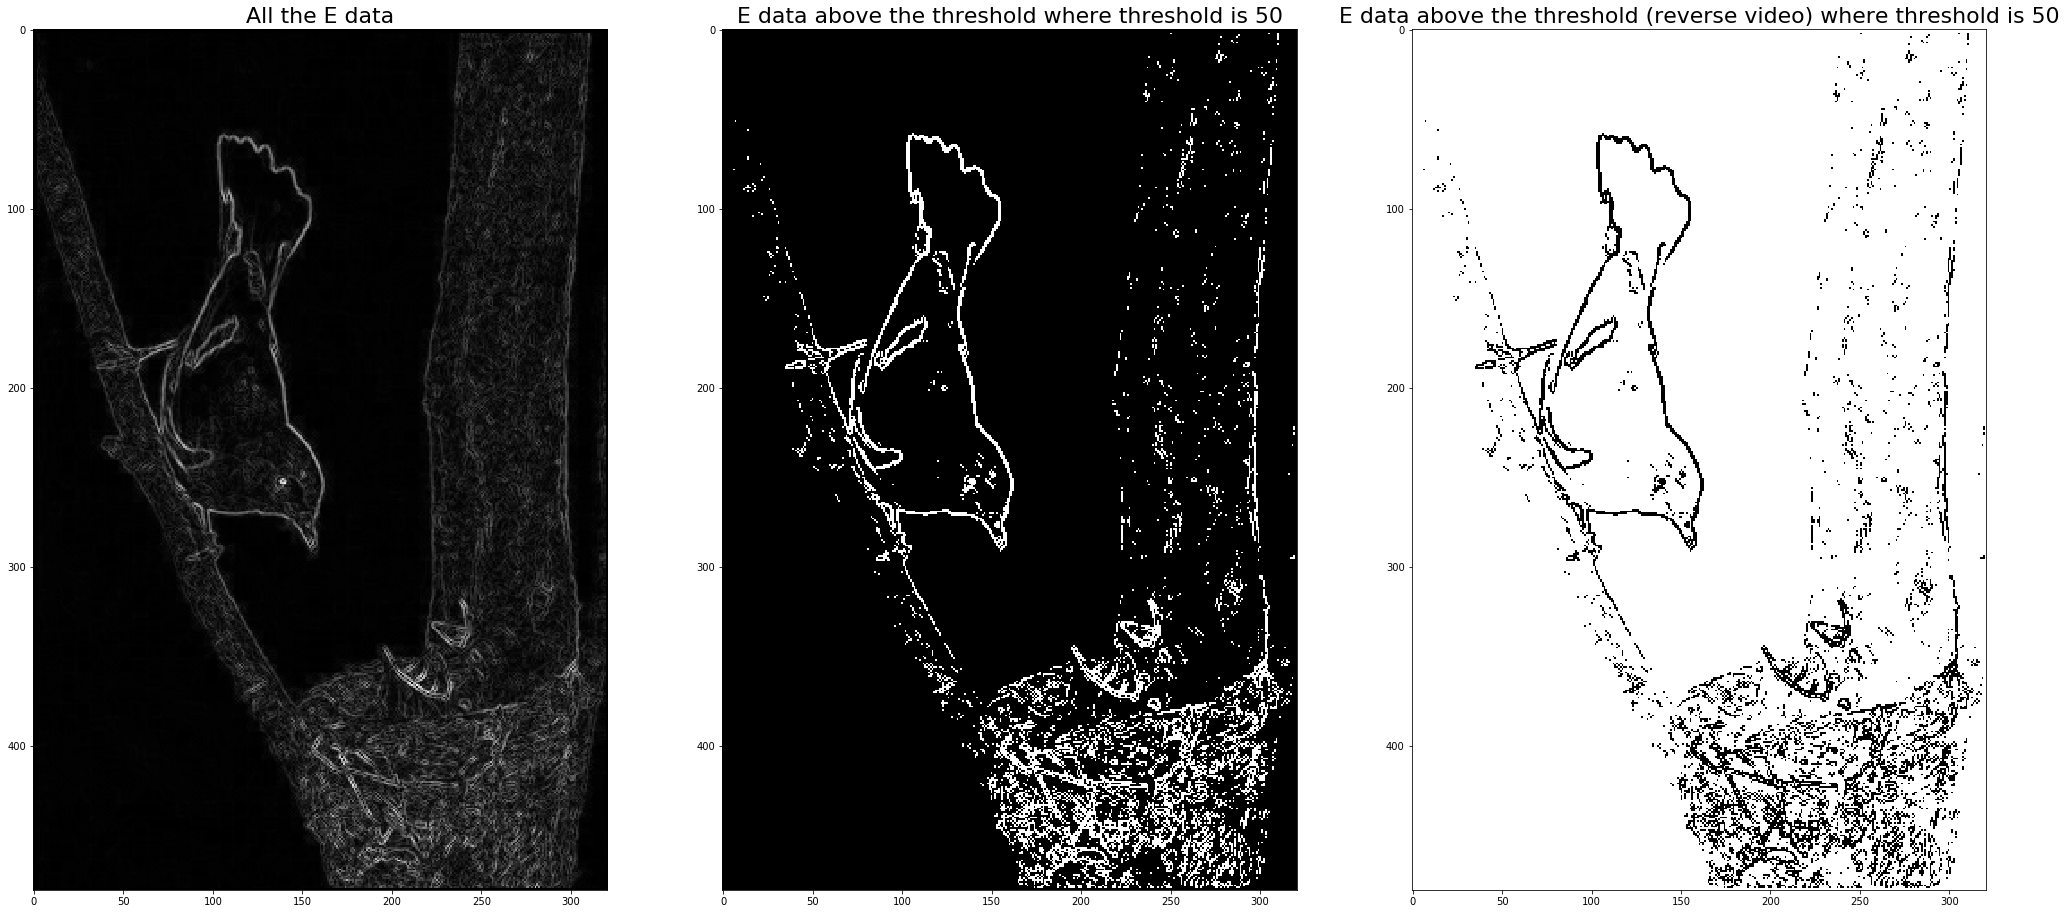

In [26]:
edgeDetection('bird.png', 50)

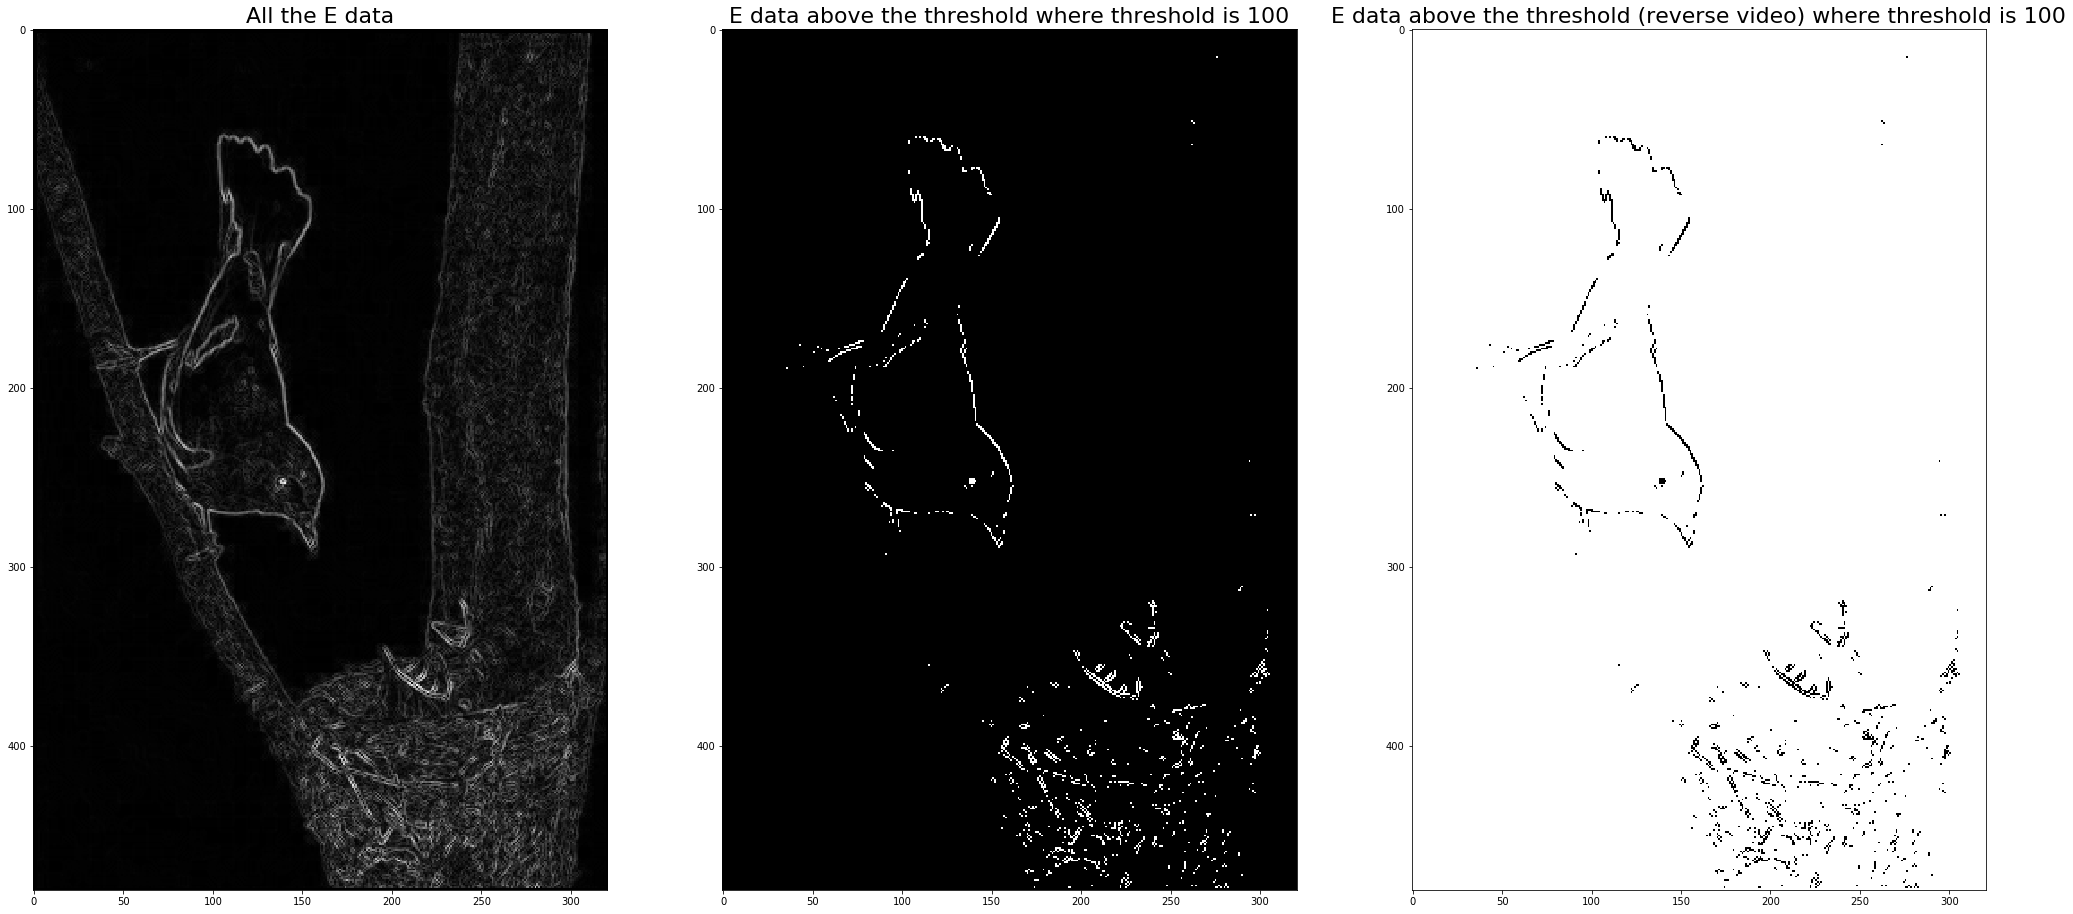

In [27]:
edgeDetection('bird.png', 100)

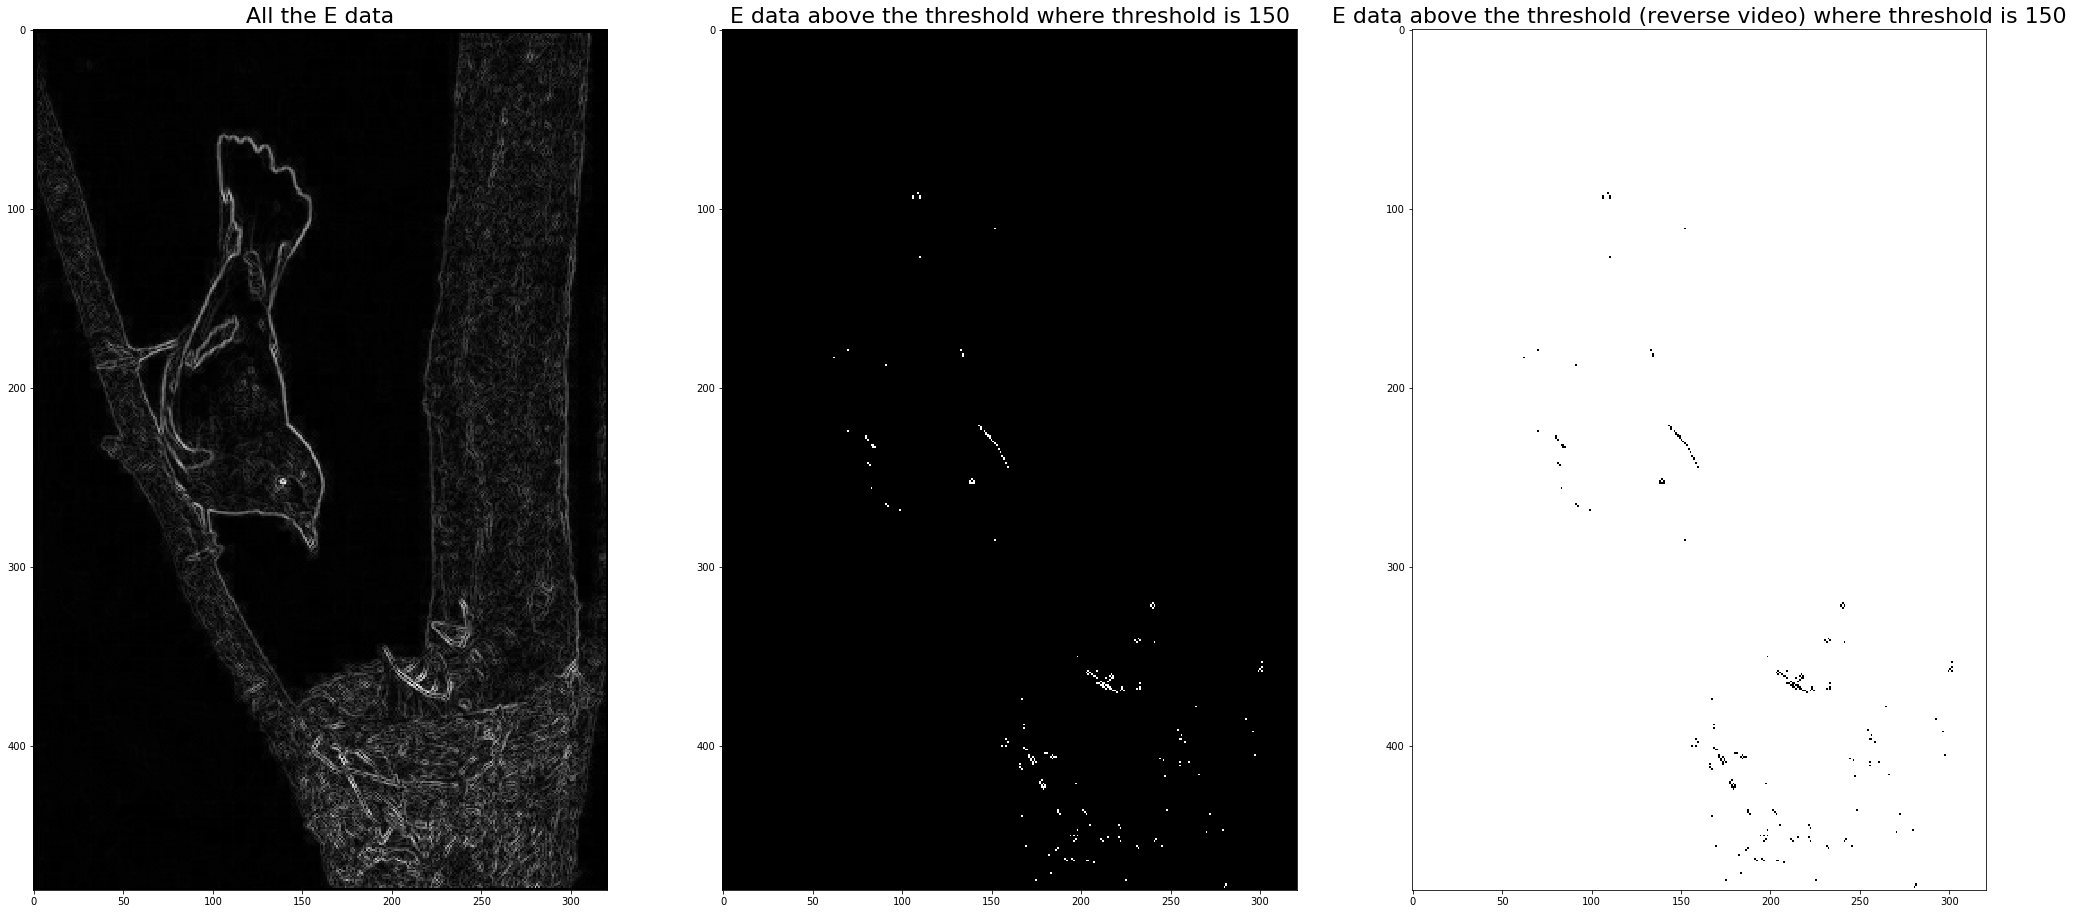

In [28]:
edgeDetection('bird.png', 150)

# Component Identification

In [29]:
def componentIdentification (img, threshold):
    
    #read in image
    a = np.array(Image.open(img))
    
    #get the dimensions of the image 
    m, n = a.shape
    
    #convert to a float 
    b = a.astype(float)
    
    #edge matrix 
    e = np.zeros((m, n))
    e[2:m-1, 2:n-1] = (abs(b[3:m, 2:n-1] - b[1:m-2, 2:n-1]) +
                       abs(b[2:m-1, 3:n] - b[2:m-1, 1:n-2]))
    
    #scale E to [0, 255]
    emin = np.min(np.min(e))
    emax = np.max(np.max(e))
    
    #plot it 
    e = np.round(255 * (e - emin) / (emax - emin))
    
    #using a threshold 
    e_thresh = 255 * (threshold < e)
    
    #show plots 
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(a, cmap='gray')
    ax[0].set_title('Original Image', fontsize=18)
    ax[1].imshow(e_thresh.astype(np.uint8), cmap='gray') 
    ax[1].set_title('E data above the threshold where threshold is {}'.format(threshold), fontsize=18)
    plt.show()

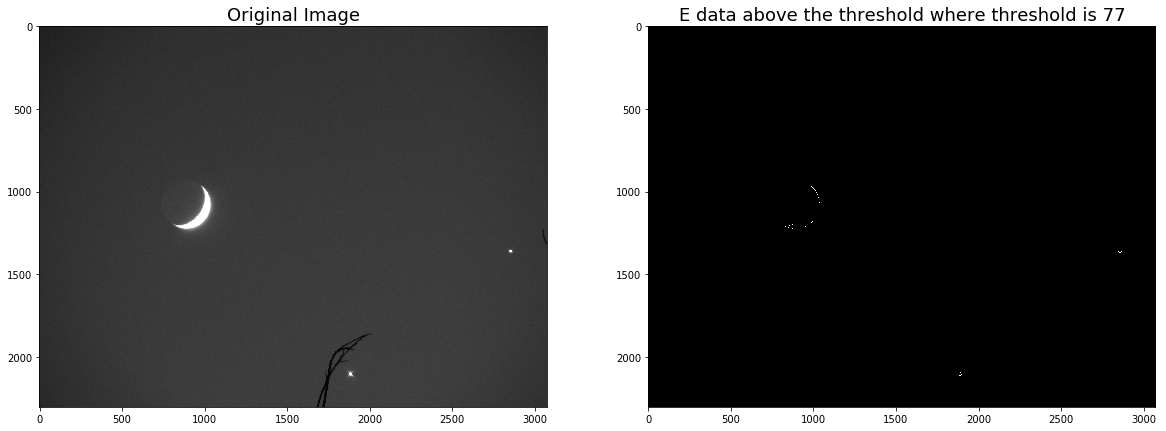

In [30]:
#show threshold image so that, in the image, everything is black 
#except for the two stars and the moon
componentIdentification('conjunction_gray.png',77)

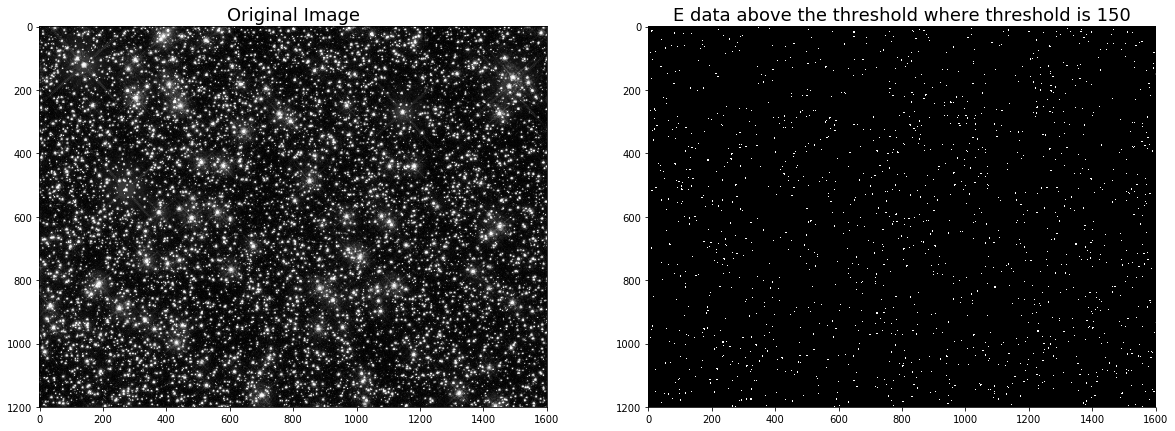

In [31]:
#determine a threshold so that the threshold image separates 
#white blob of stars 
componentIdentification('star_field_gray.png', 150)